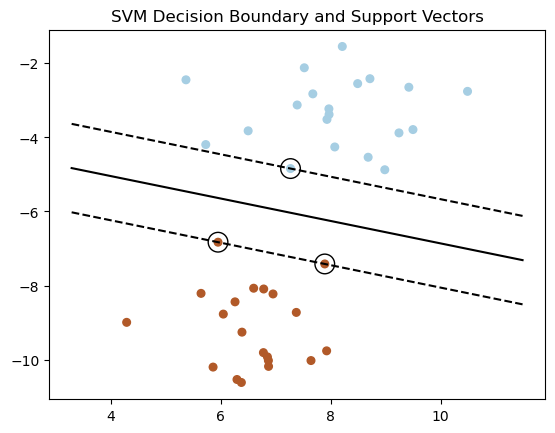

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. 데이터 생성 (2D 이진 분류용)
X, y = datasets.make_blobs(n_samples=40, centers=2, random_state=6)

# 2. SVM 학습 (선형 커널)
clf = SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# 3. 결정 경계와 마진을 계산
w = clf.coef_[0]                # 가중치 벡터
b = clf.intercept_[0]           # 절편
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 30)

# 결정 경계
yy = - (w[0] * xx + b) / w[1]
# 마진: w·x + b = ±1
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# 4. 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 결정 경계와 마진
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 서포트 벡터 강조
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')

plt.title("SVM Decision Boundary and Support Vectors")
plt.show()

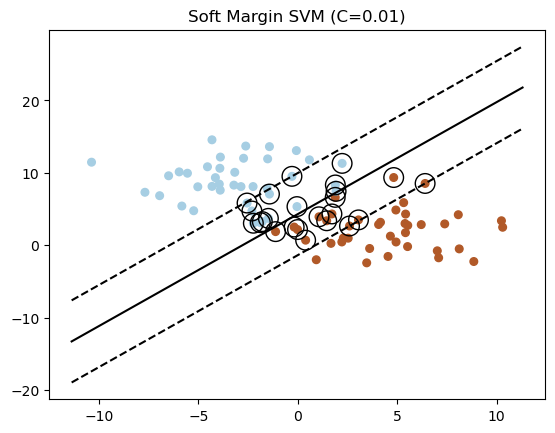

In [19]:
# 1. 데이터 생성 (클래스가 완벽히 분리되지 않도록 만들기)
X, y = datasets.make_blobs(n_samples=80, centers=2, cluster_std=3.0, random_state=42)

# 2. SVM 학습 (C 값 작게 설정 -> 소프트 마진, 오분류 허용)
clf = SVC(kernel="linear", C=0.01)
clf.fit(X, y)

# 3. 결정 경계와 마진 계산
w = clf.coef_[0]
b = clf.intercept_[0]
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 30)

yy = - (w[0] * xx + b) / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# 4. 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 결정 경계와 마진
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 서포트 벡터 강조
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')

plt.title("Soft Margin SVM (C=0.01)")
plt.show()

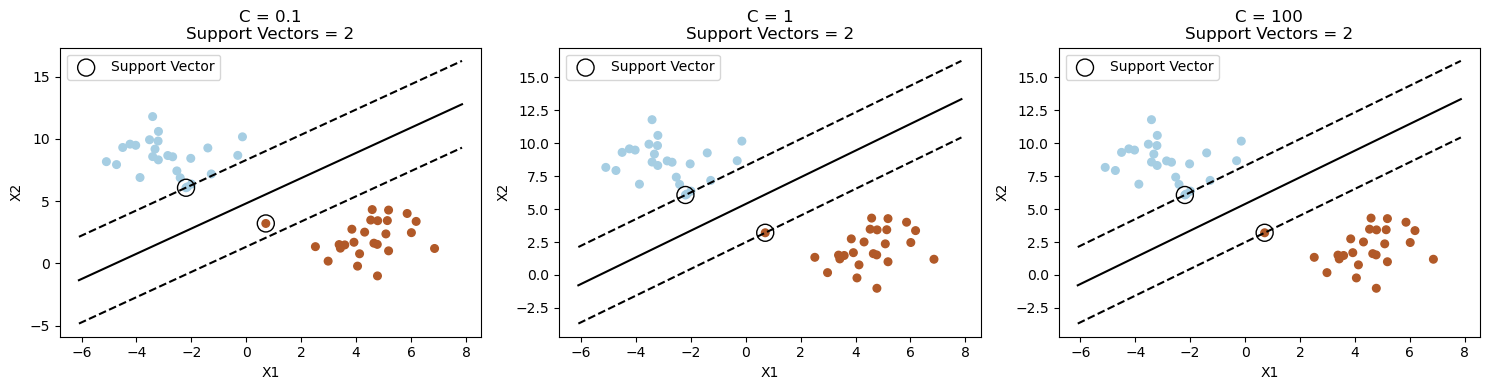

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# 데이터 생성
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1.5, random_state=42)

# C 값 리스트
C_values = [0.1, 1, 100]

plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    # 결정 경계와 마진 계산
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 30)
    yy = - (w[0] * xx + b) / w[1]
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
    yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
    
    # 시각화
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=30)
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
                s=150, facecolors='none', edgecolors='k', label='Support Vector')
    plt.title(f"C = {C}\nSupport Vectors = {len(clf.support_vectors_)}")
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.legend()

plt.tight_layout()
plt.show()

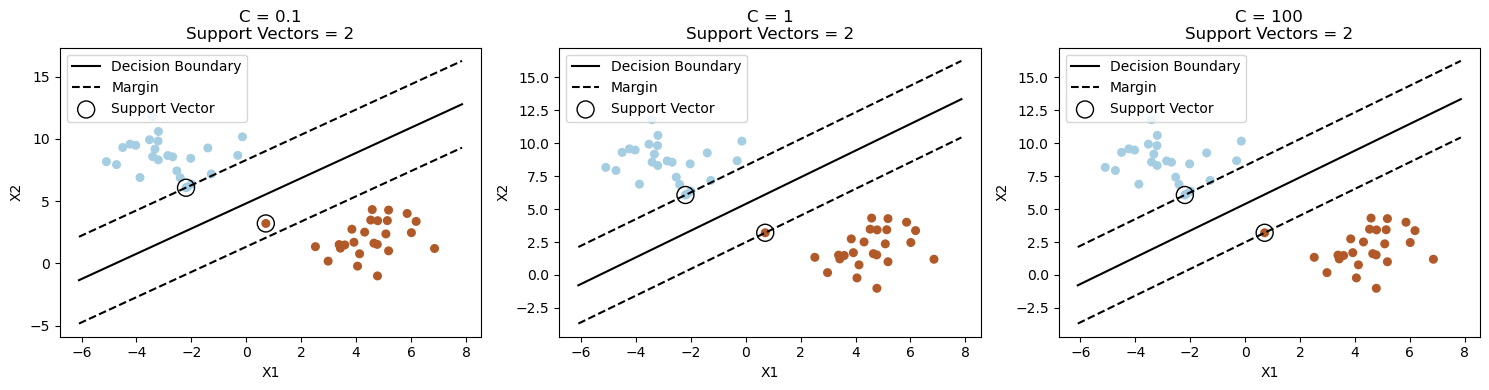

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# 데이터 생성 (2D, 분류용)
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1.5, random_state=42)

# C 값 리스트 (소프트 마진)
C_values = [0.1, 1, 100]

plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    # 결정 경계와 마진 계산
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 30)
    yy = - (w[0] * xx + b) / w[1]
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
    yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
    
    # 시각화
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=30)
    plt.plot(xx, yy, 'k-', label='Decision Boundary')          # 결정 경계
    plt.plot(xx, yy_down, 'k--', label='Margin')              # 마진
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
                s=150, facecolors='none', edgecolors='k', label='Support Vector')
    
    plt.title(f"C = {C}\nSupport Vectors = {len(clf.support_vectors_)}")
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.legend()

plt.tight_layout()
plt.show()

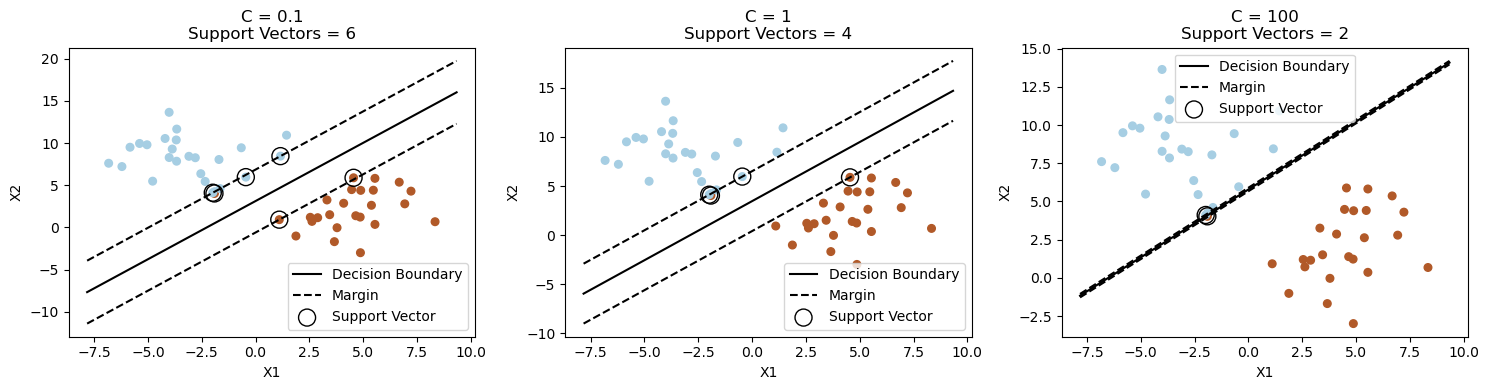

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# 1. 데이터 생성 (클래스가 약간 겹치도록)
X, y = make_blobs(n_samples=50, centers=2, cluster_std=2.5, random_state=42)

# 2. C 값 리스트
C_values = [0.1, 1, 100]

plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    # 결정 경계와 마진 계산
    w = clf.coef_[0]
    b = clf.intercept_[0]
    xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 30)
    yy = - (w[0] * xx + b) / w[1]
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
    yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
    
    # 시각화
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=30)
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
    plt.plot(xx, yy_down, 'k--', label='Margin')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
                s=150, facecolors='none', edgecolors='k', label='Support Vector')
    
    plt.title(f"C = {C}\nSupport Vectors = {len(clf.support_vectors_)}")
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.legend()

plt.tight_layout()
plt.show()

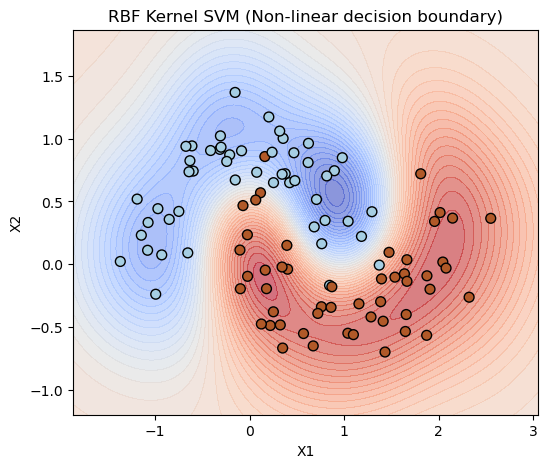

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# 데이터 생성 (선형 분리 불가능)
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# C 값과 gamma 설정
clf = SVC(kernel='rbf', C=1, gamma=2)  # gamma 크면 국소적 영향 커짐
clf.fit(X, y)

# 결정 경계 시각화
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, levels=50, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("RBF Kernel SVM (Non-linear decision boundary)")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

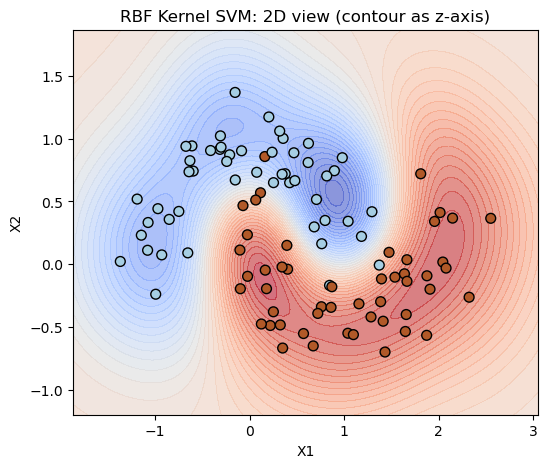

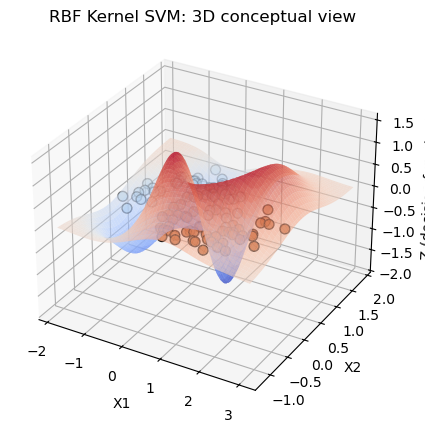

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# 1. 2D 데이터 생성 (태극무늬처럼 겹침)
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# 2. RBF SVM 학습
clf = SVC(kernel='rbf', C=1, gamma=2)  # gamma ↑ → 국소적 영향
clf.fit(X, y)

# 3. 결정 함수 값 계산 (z축 높이로 사용)
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. 2D 평면에서 등고선 시각화
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, levels=50, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("RBF Kernel SVM: 2D view (contour as z-axis)")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

# 5. 3D z축 개념 시각화
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X[:,0], X[:,1], np.zeros_like(X[:,0]), c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
ax.set_xlabel("X1"); ax.set_ylabel("X2"); ax.set_zlabel("Z (decision function)")
ax.set_title("RBF Kernel SVM: 3D conceptual view")
plt.show()

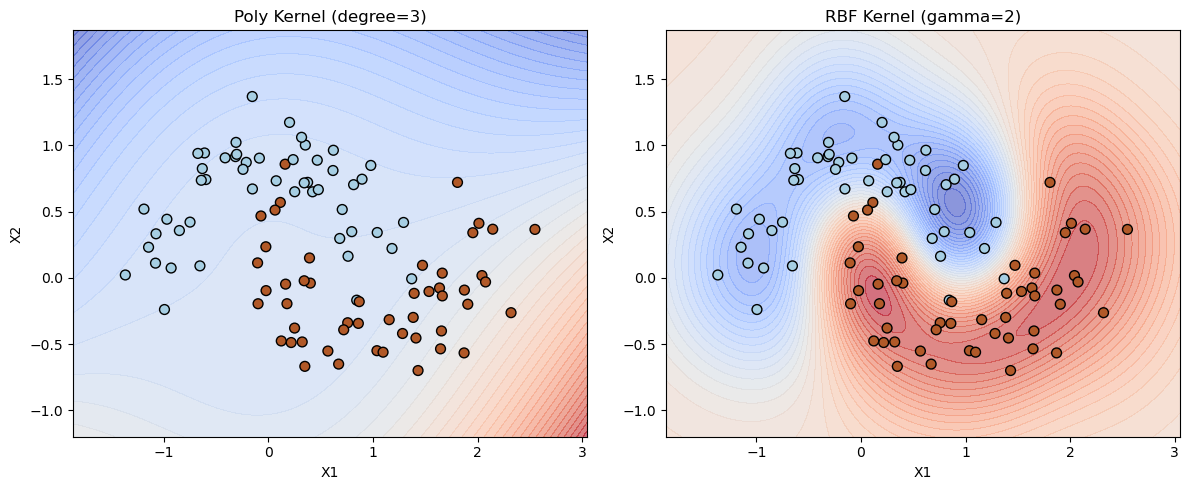

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# 1. 2D 데이터 생성 (태극무늬처럼 겹침)
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# 2. SVM 모델 정의
clf_poly = SVC(kernel='poly', degree=3, C=1)  # Poly 커널
clf_rbf  = SVC(kernel='rbf', gamma=2, C=1)   # RBF 커널

clf_poly.fit(X, y)
clf_rbf.fit(X, y)

# 3. 결정 함수 계산
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300))

Z_poly = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rbf  = clf_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 4. 2D 결정 경계 시각화
plt.figure(figsize=(12,5))

# Poly 커널
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z_poly, levels=50, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Poly Kernel (degree=3)")
plt.xlabel("X1"); plt.ylabel("X2")

# RBF 커널
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_rbf, levels=50, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("RBF Kernel (gamma=2)")
plt.xlabel("X1"); plt.ylabel("X2")

plt.tight_layout()
plt.show()

In [17]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2) # Iris-Virginica

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)

svm_clf.fit(X, y)

X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [16]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])